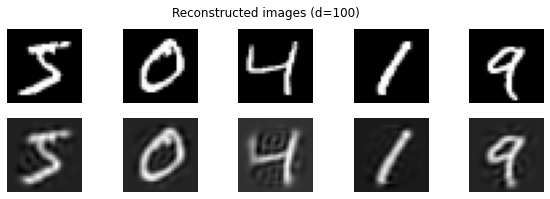

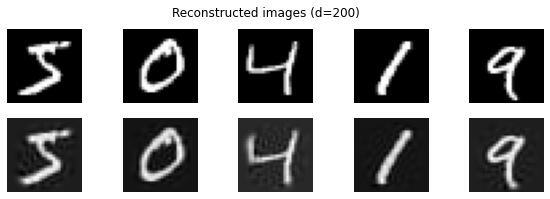

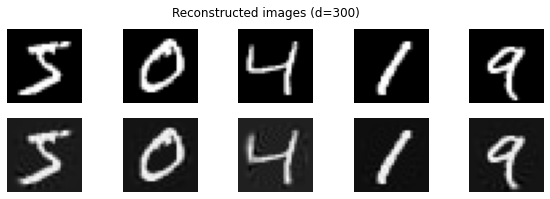

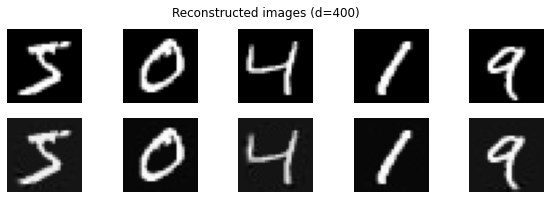

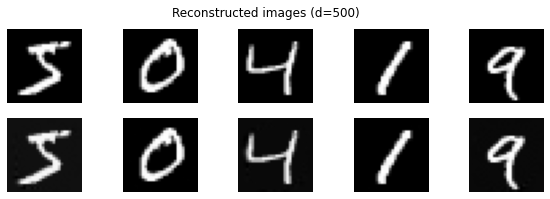

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data.values
y = mnist.target.astype(np.uint8)

# Flatten the images
X = X.reshape(X.shape[0], -1)
n = len(X[0])

# Compute the mean
mean = np.mean(X, axis=0)

# Center the data
X_centered = X - mean

# Compute the covariance matrix
#covariance_matrix = np.cov(X_centered.T)
C = (np.transpose(X_centered)@X_centered)/(n)

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(C)

# Sort the eigenvectors by eigenvalue in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

total_variance = np.sum(eigenvalues)
variance_explained = eigenvalues / total_variance

# Reconstruct the dataset using different dimensional representations
ds = [100, 200, 300, 400, 500]
for d in ds:
    # Project the data onto the first d principal components
    projection_matrix = eigenvectors[:, :d]
    projected_data = np.dot(X_centered, projection_matrix)

    # Reconstruct the data and add back the mean
    rec_data = np.dot(projected_data, projection_matrix.T) + mean

    # Reshape the reconstructed data to its original shape
    rec_images = np.reshape(rec_data, (70000, 28, 28))

    # Show the first 5 reconstructed images
    plt.figure(figsize=(10, 3))
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.subplot(2, 5, i+6)
        plt.imshow(rec_images[i], cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Reconstructed images (d={d})')
    plt.show()
